In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#kaggle_train = pd.read_csv('../DataSets/Kaggle/train.csv')
#kaggle_test = pd.read_csv('../DataSets/Kaggle/test.csv')
titanic_complete = pd.read_csv('../DataSets/TensorFlow/Titanic.csv')

In [4]:
titanic_complete.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [5]:

titanic_complete.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [6]:
titanic_complete.shape

(1309, 14)

In [7]:
# Dropping unwanted columns
titanic_complete=titanic_complete.drop(['name','cabin','body','boat','home.dest'],1)
titanic_complete

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29,0,0,24160,211.3375,S
1,1,1,male,0.9167,1,2,113781,151.55,S
2,1,0,female,2,1,2,113781,151.55,S
3,1,0,male,30,1,2,113781,151.55,S
4,1,0,female,25,1,2,113781,151.55,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,2665,14.4542,C
1305,3,0,female,?,1,0,2665,14.4542,C
1306,3,0,male,26.5,0,0,2656,7.225,C
1307,3,0,male,27,0,0,2670,7.225,C


In [8]:
titanic_complete = titanic_complete.replace('?',np.nan)

In [9]:
titanic_complete.dtypes

pclass       int64
survived     int64
sex         object
age         object
sibsp        int64
parch        int64
ticket      object
fare        object
embarked    object
dtype: object

In [10]:
#Converting age and fare into float
titanic_complete['age'] = titanic_complete['age'].astype(float)
titanic_complete['fare'] = titanic_complete['fare'].astype(float)
titanic_complete.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

In [11]:
# Use Pandas get_dummies to convert categorical data
titanic_complete = pd.get_dummies(titanic_complete)
titanic_complete.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,ticket_110152,ticket_110413,...,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
#View Missing Values
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data

age              263
fare               1
pclass             0
ticket_368702      0
ticket_367229      0
                ... 
ticket_28425       0
ticket_28551       0
ticket_28664       0
ticket_28665       0
embarked_S         0
Length: 940, dtype: int64

In [13]:
# Fill the missing values with the average of all Ages - MEAN
import math
mean = titanic_complete['age'].dropna().mean()
print(mean)
titanic_complete['age'] = titanic_complete['age'].fillna(math.ceil(mean))

29.8811345124283


In [14]:
#Converting age and fare into float
titanic_complete['age'] = titanic_complete['age'].astype(float)
titanic_complete['fare'] = titanic_complete['fare'].astype(float)
titanic_complete.dtypes

pclass                int64
survived              int64
age                 float64
sibsp                 int64
parch                 int64
                     ...   
ticket_W/C 14208      uint8
ticket_WE/P 5735      uint8
embarked_C            uint8
embarked_Q            uint8
embarked_S            uint8
Length: 940, dtype: object

In [15]:
# Fill the missing values with the average of all Ages - MEAN
import math
mean = titanic_complete['age'].dropna().mean()
print(mean)
titanic_complete['age'] = titanic_complete['age'].fillna(math.ceil(mean))

29.90501657754011


In [16]:
# fill nan with the most frequent values - MODE
from statistics import mode

titanic_complete['fare'] = titanic_complete['fare'].fillna(mode(titanic_complete['fare']))

In [17]:
#View Missing Values
missing_data = titanic_complete.isnull().sum().sort_values(ascending = False)
missing_data

pclass           0
ticket_368702    0
ticket_367229    0
ticket_367230    0
ticket_367231    0
                ..
ticket_28404     0
ticket_28424     0
ticket_28425     0
ticket_28551     0
embarked_S       0
Length: 940, dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Use Pandas get_dummies to convert categorical data

titanic_complete = pd.get_dummies(titanic_complete,drop_first =True)
titanic_complete.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,ticket_110152,ticket_110413,...,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
X = titanic_complete.drop("survived", axis=1)
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,ticket_110152,ticket_110413,ticket_110465,...,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.9167,1,2,151.5500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2.0000,1,2,151.5500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,30.0000,1,2,151.5500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,25.0000,1,2,151.5500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Assign X (data) and y (target)
X = titanic_complete.drop('survived', axis = 1)
y = titanic_complete['survived']
print(X.shape, y.shape)

(1309, 939) (1309,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## KNeighbors

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.689
k: 3, Train/Test Score: 0.777/0.625
k: 5, Train/Test Score: 0.694/0.604
k: 7, Train/Test Score: 0.644/0.607
k: 9, Train/Test Score: 0.643/0.598
k: 11, Train/Test Score: 0.636/0.598
k: 13, Train/Test Score: 0.631/0.598
k: 15, Train/Test Score: 0.629/0.595
k: 17, Train/Test Score: 0.629/0.598
k: 19, Train/Test Score: 0.629/0.598


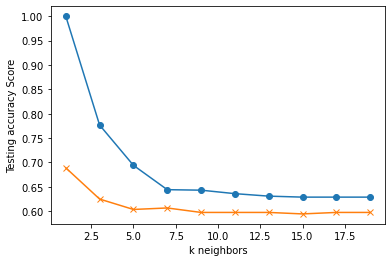

In [25]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.598


## Grid Search


In [27]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [28]:
 # Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [29]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   2.7s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   2.4s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   2.7s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   2.5s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   1.7s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   2.8s
[CV 2/5] END ...............................C=1, gamma=0.001; total time=   2.4s
[CV 3/5] END ...............................C=1, gamma=0.001; total time=   2.7s
[CV 4/5] END ...............................C=1, gamma=0.001; total time=   2.5s
[CV 5/5] END ...............................C=1, gamma=0.001; total time=   1.6s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   2.7s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [30]:
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
#              iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(gamma='auto_deprecated', kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [31]:
 # List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [32]:
 # Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [33]:
 print('Test Acc: %.3f' % grid.score(X_test, y_test))

Test Acc: 0.845


In [34]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["not-survived", "survived"]))

              precision    recall  f1-score   support

not-survived       0.84      0.91      0.87       195
    survived       0.85      0.75      0.80       133

    accuracy                           0.84       328
   macro avg       0.85      0.83      0.84       328
weighted avg       0.84      0.84      0.84       328



In [35]:
# not-survived is our majority class based on recall and f1-score